# 1. Summary

Two datasets were collected for this assignment; one conatains traffic count, environmental exposure, health status and socioeconomic data for the whole state of California, and the other contains Covid cases for the SF with various statistical units for SF. I mainly would like to see how transport, environmental, and health data relate to public health problems faced by urban residents (both non-infectious and infectious).

# 2. Access Data

In [17]:
%matplotlib inline
import pandas as pd
import json     
import requests  
import pprint   
pp = pprint.PrettyPrinter()
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon

# pip install sodapy
from sodapy import Socrata

### Dataset 1

In [18]:

client = Socrata("www.transparentrichmond.org", None)


# Returned as JSON from API / converted to Python list of dictionaries by sodapy.
results = client.get("wi9v-3g3n", limit=20000)

# Convert to pandas DataFrame
df1 = pd.DataFrame.from_records(results)
# https://www.opendatanetwork.com/dataset/www.transparentrichmond.org/wi9v-3g3n

In [3]:
df1.columns
# the columns (potential variables of interests) are printed:
# Some brief descriptions (in the listing order): 

# **Geographic**
# census Tract ID, population, county, Postal ZIP Code, city, lon, lat 

# **Environmental**
# CalEnviroScreen Score (Pollution Score multiplied by Population Characteristics Score)
# Ozone, PM 2.5 concentrations, Diesel PM, Drinking water contaminant, Pesticide ingredients, Chemical releases from facility 
# Traffic density
# Cleanup sites, Groundwater threats, hazardous waste facilities, Impaired water bodies, Solid waste sites 
# Pollution Burden indicators, Pollution Burden variable scaled with a range of 0-10

# **Health**
# Asthma, Low birth weight, Cardiovascular disease percentile

# **socioeconomic**
# Education (population over 25 with less than a high school education), Linguistic isolation,
# Poverty, unemployment, housing burdened low income households
# Population Characteristics indicators

Index(['the_geom', 'tract', 'pop2010', 'california', 'zip', 'city',
       'longitude', 'latitude', 'ciscore', 'ciscorep', 'ozone', 'ozonep', 'pm',
       'pmp', 'diesel', 'dieselp', 'drink', 'drinkp', 'pest', 'pestp',
       'rseihaz', 'rseihazp', 'traffic', 'trafficp', 'cleanups', 'cleanupsp',
       'gwthreats', 'gwthreatsp', 'haz', 'hazp', 'iwb', 'iwbp', 'swis',
       'swisp', 'pollution', 'pollutions', 'pollutionp', 'asthma', 'asthmap',
       'lbw', 'lbwp', 'cvd', 'cvdp', 'edu', 'edup', 'ling', 'lingp', 'pov',
       'povp', 'unemp', 'unempp', 'housingb', 'housingbp', 'popchar',
       'popcharsco', 'popcharp', 'children_u', 'pop_11_64_', 'elderly_ov',
       'hispanic_p', 'white_pct', 'african_am', 'native_ame', 'asian_amer',
       'other_pct', 'objectid_1', 'cidecile', 'civigintil', 'shape_leng',
       'shape_area', 'ces2018_rn'],
      dtype='object')

In [4]:
df1.shape
# 8035 rows and 71 columns

(8035, 71)

In [5]:
des=df1.describe()
des
# tract is the min. statistical unit (as the unique values is equal to row counts (N=8035))

,the_geom,tract,pop2010,california,zip,city,longitude,latitude,ciscore,ciscorep,...,african_am,native_ame,asian_amer,other_pct,objectid_1,cidecile,civigintil,shape_leng,shape_area,ces2018_rn
count,8035,8035,8035,8035,8035,8035,8035,8035,8035,8035,...,8035,8035,8035,8035,8035,8035,8035,8035,8035,7929
unique,8035,8035,4628,58,1355,789,8033,8035,4357,101,...,464,84,680,93,8035,11,21,8035,8035,20
top,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6037262704.0,0,Los Angeles,90044,Los Angeles,-122.4571446,33.6153523,0.0,0,...,0.4,0.2,1.2,2.4,1808,9,20,5887.60460041,9023031.66148,10-15%
freq,1,1,11,2343,26,632,2,1,106,145,...,227,1678,88,233,1,793,397,1,1,397


In [8]:
df1['pm']=df1['pm'].astype('float')
df1['ciscore']=df1['ciscore'].astype('float')
df1['ciscorep']=df1['ciscorep'].astype('float')
df1['asthma']=df1['asthma'].astype('float')
df1['cvd']=df1['cvd'].astype('float')
df1['lbw']=df1['lbw'].astype('float')
df1['african_am']=df1['african_am'].astype('float')
df1['white_pct']=df1['white_pct'].astype('float')
df1['hispanic_p']=df1['hispanic_p'].astype('float')
df1['asian_amer']=df1['asian_amer'].astype('float')
df1['native_ame']=df1['native_ame'].astype('float')
df1['diesel']=df1['diesel'].astype('float')
df1['pollution']=df1['pollution'].astype('float')
df1['edu']=df1['edu'].astype('float')
df1['edup']=df1['edup'].astype('float')
df1['povp']=df1['povp'].astype('float')
df1['unempp']=df1['unempp'].astype('float')
df1['traffic']=df1['traffic'].astype('float')
df1['pop2010']=df1['pop2010'].astype('float')
df1['shape_area']=df1['shape_area'].astype('float')
df1['ling']=df1['ling'].astype('float')
df1['lingp']=df1['lingp'].astype('float')


# the data types of varaiables of possible interests (for this assignment) are converted to float type for further analysis

In [9]:
df1.describe()
# Some descriptive stat can be seen after transformation of data type of 22 variables

,pop2010,ciscore,ciscorep,pm,diesel,traffic,pollution,asthma,lbw,cvd,...,ling,lingp,povp,unempp,hispanic_p,white_pct,african_am,native_ame,asian_amer,shape_area
count,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,...,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8035.000000,8.035000e+03
mean,4636.459988,27.556841,49.346609,10.353943,19.196014,936.471095,41.965360,51.977813,4.838838,8.265890,...,10.104095,46.903547,49.576851,49.354325,36.387455,41.512831,5.874860,0.461817,12.791437,5.096405e+07
std,1972.587602,16.377054,29.242894,2.643362,16.993920,907.588011,12.781356,30.552249,1.733659,2.971099,...,9.991189,30.437447,29.133703,29.354342,26.257284,26.953387,9.392534,1.418555,14.739779,4.215659e+08
min,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,8.370000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.657631e+04
25%,3358.000000,14.580000,24.000000,8.700000,8.810000,437.125000,32.240000,29.855000,3.850000,6.080000,...,2.700000,20.000000,24.000000,24.000000,14.100000,16.600000,1.100000,0.100000,3.100000,1.034866e+06
50%,4413.000000,24.710000,49.000000,10.370000,16.450000,695.390000,41.800000,45.270000,4.860000,7.940000,...,7.000000,46.000000,50.000000,49.000000,28.600000,41.500000,2.500000,0.300000,7.500000,1.915310e+06
75%,5656.500000,39.160000,75.000000,12.050000,24.645000,1185.030000,51.015000,65.990000,5.890000,10.040000,...,14.500000,73.000000,75.000000,75.000000,55.500000,65.500000,6.300000,0.500000,16.200000,4.779685e+06
max,37452.000000,94.090000,100.000000,19.600000,253.730000,45687.870000,81.190000,278.830000,14.890000,21.260000,...,72.300000,100.000000,100.000000,100.000000,100.000000,100.000000,89.800000,78.500000,89.900000,1.811731e+10


### Dataset 2

In [10]:
endpoint_url = "https://data.sfgov.org/resource/tpyr-dvnc.json"
response = requests.get(endpoint_url)
results3 = response.text
data = json.loads(results3)
df2=pd.DataFrame.from_records(data)
df2.head()

,area_type,id,count,rate,deaths,acs_population,last_updated_at,multipolygon
0,ZCTA,94130,39.0,127.28459530026109,0.0,3064,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
1,ZCTA,94158,104.0,142.64161294746947,0.0,7291,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
2,ZCTA,94107,384.0,129.34083330526457,NaN,29689,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
3,ZCTA,94105,97.0,105.95303113052977,NaN,9155,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
4,ZCTA,94134,970.0,228.39113748204656,NaN,42471,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."


In [11]:
type(df2['rate'].iloc[0])

str

In [12]:
df2['deaths']=df2['deaths'].astype('float')
df2['rate']=df2['rate'].astype('float')
# change the data type for variables of interest in df2 to 'float'

In [13]:
df2 = df2[df2['area_type']=='Census Tract']
df2['id']
# We only want "census tract" data
# Found the census tract ID is encoded differently than df1 (see below)

65     06075023103
66     06075980900
67     06075017902
68     06075980600
69     06075061000
          ...     
259    06075980501
260    06075980300
261    06075032601
262    06075022704
263    06075033201
Name: id, Length: 195, dtype: object

In [14]:
df1['tract']

0       6083002103.0
1       6083002402.0
2       6083002102.0
3       6083002010.0
4       6083002009.0
            ...     
8030    6037430302.0
8031    6037430723.0
8032      6037431100
8033    6037533603.0
8034    6037534101.0
Name: tract, Length: 8035, dtype: object

In [15]:
for i in range(len(df2['id'])):
    df2['id'].iloc[i]= df2['id'].iloc[i][1::]

df2['id']
# strip the first character "0" for df2

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


65     6075023103
66     6075980900
67     6075017902
68     6075980600
69     6075061000
          ...    
259    6075980501
260    6075980300
261    6075032601
262    6075022704
263    6075033201
Name: id, Length: 195, dtype: object

In [16]:
for i in range(len(df1['tract'])):
    if df1['tract'].iloc[i].find('.') != -1:
        df1['tract'].iloc[i] = df1['tract'].iloc[i][:-2]
        
df1['tract']
# strip, if any, the last two characters ".0" for sf


0       6083002103
1       6083002402
2       6083002102
3       6083002010
4       6083002009
           ...    
8030    6037430302
8031    6037430723
8032    6037431100
8033    6037533603
8034    6037534101
Name: tract, Length: 8035, dtype: object

In [17]:
df3=pd.merge(df1, df2, left_on='tract', right_on='id')
df3
# Now the foramtting of census tract ID of two datasets are the same so that we can merge on 'tract'(left) and 'ID' (right)
# 195 rows left

,the_geom,tract,pop2010,california,zip,city,longitude,latitude,ciscore,ciscorep,...,shape_area,ces2018_rn,area_type,id,count,rate,deaths,acs_population,last_updated_at,multipolygon
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6075032602,4316.0,San Francisco,94122,San Francisco,-122.4825954,37.7589003,12.11,18.0,...,472221.868329,15-20%,Census Tract,6075032602,23.0,47.025148,0.0,4891,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6075032601,4416.0,San Francisco,94122,San Francisco,-122.4807924,37.7624848,10.00,13.0,...,415486.927604,10-15%,Census Tract,6075032601,17,NaN,0.0,5404,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6075016100,5366.0,San Francisco,94115,San Francisco,-122.4286631,37.7799831,24.64,49.0,...,369024.119966,45-50%,Census Tract,6075016100,105.0,204.280156,0.0,5140,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6075016400,3778.0,San Francisco,94117,San Francisco,-122.4369729,37.7750995,13.25,21.0,...,309101.524852,20-25%,Census Tract,6075016400,35.0,83.592071,0.0,4187,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6075016300,4293.0,San Francisco,94102,San Francisco,-122.4295509,37.7760456,17.18,31.0,...,246218.952748,30-35%,Census Tract,6075016300,42.0,88.514226,0.0,4745,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6075017601,7630.0,San Francisco,94103,San Francisco,-122.4107241,37.7794338,41.93,79.0,...,626704.162028,75-80%,Census Tract,6075017601,177.0,191.475552,NaN,9244,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
191,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6075017000,3689.0,San Francisco,94114,San Francisco,-122.4394975,37.7648874,8.13,9.0,...,469307.287884,5-10%,Census Tract,6075017000,37.0,86.691659,NaN,4268,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
192,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6075016900,2924.0,San Francisco,94114,San Francisco,-122.4324782,37.7670961,9.64,12.0,...,298213.767968,10-15%,Census Tract,6075016900,20.0,62.676277,0.0,3191,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
193,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6075016700,4652.0,San Francisco,94117,San Francisco,-122.4377358,37.7703481,9.21,11.0,...,490442.135881,10-15%,Census Tract,6075016700,12.0,NaN,0.0,5225,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."


# 3. Filter (missing data and outliers)

In [18]:
df3.notnull().sum().unique()
# found there is a unique value of sum of notnull, indicatng some columns having missing values

array([195, 192, 191, 160, 125])

In [19]:
df3=df3.dropna()
df3.head()
# drop all missing values


,the_geom,tract,pop2010,california,zip,city,longitude,latitude,ciscore,ciscorep,...,shape_area,ces2018_rn,area_type,id,count,rate,deaths,acs_population,last_updated_at,multipolygon
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6075032602,4316.0,San Francisco,94122,San Francisco,-122.4825954,37.7589003,12.11,18.0,...,472221.868329,15-20%,Census Tract,6075032602,23.0,47.025148,0.0,4891,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6075016100,5366.0,San Francisco,94115,San Francisco,-122.4286631,37.7799831,24.64,49.0,...,369024.119966,45-50%,Census Tract,6075016100,105.0,204.280156,0.0,5140,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6075016400,3778.0,San Francisco,94117,San Francisco,-122.4369729,37.7750995,13.25,21.0,...,309101.524852,20-25%,Census Tract,6075016400,35.0,83.592071,0.0,4187,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6075016300,4293.0,San Francisco,94102,San Francisco,-122.4295509,37.7760456,17.18,31.0,...,246218.952748,30-35%,Census Tract,6075016300,42.0,88.514226,0.0,4745,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
5,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6075016500,5083.0,San Francisco,94117,San Francisco,-122.4477884,37.7741958,9.98,13.0,...,372071.979364,10-15%,Census Tract,6075016500,35.0,63.787133,0.0,5487,2020-10-16T18:01:19.973,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."


In [20]:
df3.shape
# 95 rows left

(95, 79)

Text(0.5, 1.0, 'covid rate')

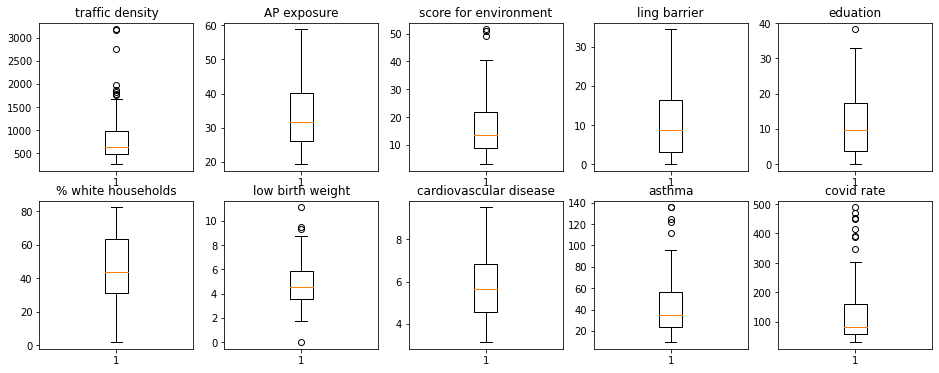

In [21]:
plt.figure(figsize=(16, 6))

plt.subplot(251)
plt.boxplot(df3.traffic)
plt.title('traffic density')

plt.subplot(252)
plt.boxplot(df3.pollution)
plt.title('AP exposure')

plt.subplot(253)
plt.boxplot(df3.ciscore)
plt.title('score for environment')

plt.subplot(254)
plt.boxplot(df3.ling)
plt.title('ling barrier')

plt.subplot(255)
plt.boxplot(df3.edu)
plt.title('eduation')

plt.subplot(256)
plt.boxplot(df3.white_pct)
plt.title('% white households')


plt.subplot(257)
plt.boxplot(df3.lbw)
plt.title('low birth weight')

plt.subplot(258)
plt.boxplot(df3.cvd)
plt.title('cardiovascular disease')

plt.subplot(259)
plt.boxplot(df3.asthma)
plt.title('asthma')

plt.subplot(2,5,10)
plt.boxplot(df3.rate)
plt.title('covid rate')

# plotting some major variables of interest to see if there is extreme values
# found potential outliers in 'traffic density'

In [22]:
low=df3['traffic'].quantile(.05)
high=df3['traffic'].quantile(.95)
high
# find the first and last 5% of values

1835.4589999999998

In [23]:
filtered = df3[(df3['traffic'] < high) & (df3['traffic'] > low)]
filtered['traffic'].describe()
# remove the first and last 5% of values

count      85.000000
mean      767.161176
std       384.275486
min       328.900000
25%       508.970000
50%       632.840000
75%       892.940000
max      1821.470000
Name: traffic, dtype: float64

In [24]:
filtered.shape
# sample size further reduced to 85 

(85, 79)

# 4. Groupby operations or statistical summary

In [25]:
df4=filtered
df5=df4[['traffic','pollution','rate','ciscore','asthma','edu', 'ling','cvd','lbw','white_pct']].groupby(df4['zip']).mean()
df5
# We have three geo-levels, i.e. tract, zip, city (SF).
# Used the groupby operation to produce mean values of some variables for every zip code

,traffic,pollution,rate,ciscore,asthma,edu,ling,cvd,lbw,white_pct
zip,,,,,,,,,,
94102,682.047500,35.180000,105.805593,21.605000,82.865000,5.400000,7.700000,6.065000,5.565000,52.975000
94103,1080.125000,42.557500,303.673496,29.920000,71.585000,15.525000,9.450000,7.190000,5.570000,41.700000
94107,985.450000,55.920000,135.951662,14.630000,36.760000,0.500000,2.300000,5.570000,4.670000,69.200000
94108,643.630000,39.245000,106.182122,21.985000,28.620000,11.200000,11.800000,3.440000,6.850000,45.400000
94109,658.376667,38.516667,73.287199,13.430000,49.793333,6.500000,7.133333,5.006667,4.223333,64.333333
94110,897.006250,34.415000,196.325043,19.490000,56.566250,14.712500,9.962500,6.776250,4.266250,39.175000
94112,817.348333,24.708333,156.083419,13.400000,43.098333,16.733333,17.066667,5.763333,4.765000,23.616667
94114,395.082500,24.505000,71.259757,5.935000,25.132500,3.175000,1.975000,5.687500,3.925000,72.650000
94115,640.972000,32.998000,125.637453,15.046000,46.490000,6.300000,10.120000,4.896000,5.016000,54.040000


In [26]:
df4.groupby('zip')[['traffic','pollution','rate','ciscore','asthma','edu', 'ling','cvd','lbw','white_pct']].max()

,traffic,pollution,rate,ciscore,asthma,edu,ling,cvd,lbw,white_pct
zip,,,,,,,,,,
94102,762.12,38.52,119.118523,26.28,122.23,9.1,16.7,8.05,8.74,60.3
94103,1651.57,49.90,450.405696,32.31,73.72,24.8,23.1,7.64,7.08,49.5
94107,985.45,55.92,135.951662,14.63,36.76,0.5,2.3,5.57,4.67,69.2
94108,717.55,43.16,130.090498,28.18,28.91,16.4,17.0,3.76,7.58,56.1
94109,708.87,44.43,84.257206,16.92,57.05,14.7,12.3,5.68,4.42,81.1
94110,1821.47,47.64,413.606494,23.70,57.85,30.3,18.5,6.92,5.54,53.8
94112,1587.68,31.67,289.363401,20.13,55.46,24.8,27.8,7.27,5.68,49.3
94114,442.93,26.85,84.774500,9.64,27.26,5.2,3.7,6.18,7.10,77.4
94115,866.19,38.34,204.280156,24.64,58.87,17.7,29.9,6.13,11.11,81.3


# 5. Data visulizations w/ Matplotlib or Seaborn


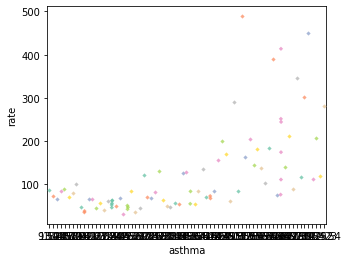

In [27]:
plt.figure(1, figsize=(5,4), )
ax =  sns.stripplot("asthma", "rate", data=df4,
                   palette="Set2", size=3, marker="D",
                   edgecolor="gray", alpha=.75)
# asthma and covid rate seems related

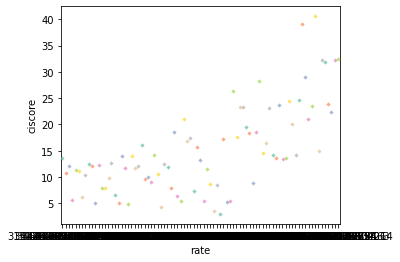

In [29]:
plt.figure(1, figsize=(5,4), )
ax =  sns.stripplot("rate", "ciscore", data=df4,
                   palette="Set2", size=3, marker="D",
                   edgecolor="gray", alpha=.75)
# the score (calculated by multiplying environmental and population factors) and covid rate also seems related

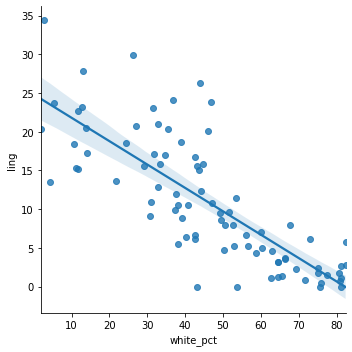

In [30]:
sns.lmplot("white_pct", "ling", data=df4, fit_reg=True, scatter=True)
# white people has low lingustic barrier, as can be imagined

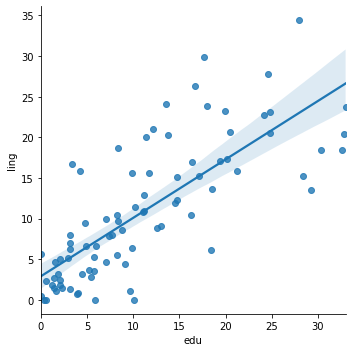

In [31]:
sns.lmplot("edu", "ling", data=df4)
# linguistic barrier correlate with the percent of people who do not receive education

<AxesSubplot:xlabel='edu', ylabel='asthma'>

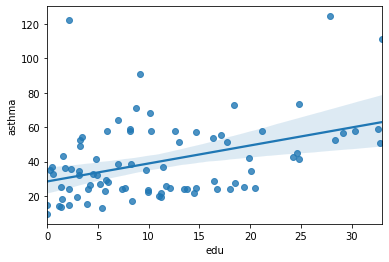

In [32]:
sns.regplot("edu", "asthma", data=df4)
# socioeconomic (education attainment) could be correlated with health (asthma)

<AxesSubplot:xlabel='ling', ylabel='cvd'>

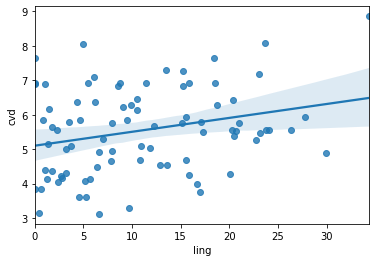

In [39]:
sns.regplot("ling", "cvd", data=df4)
# again, socioeconomic (linguistic barrier) could be correlated with health (cardiovascular diesease)

<AxesSubplot:xlabel='white_pct', ylabel='rate'>

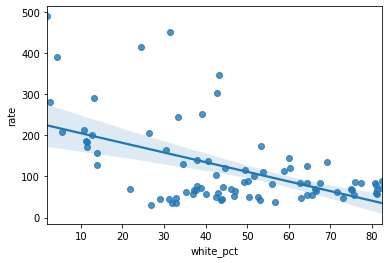

In [40]:
sns.regplot("white_pct", "rate", data=df4)
# % white household is negatively correlated with covid rate

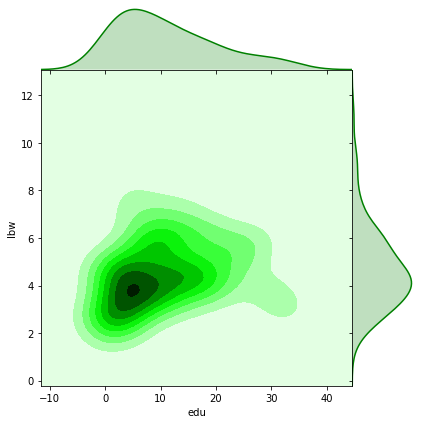

In [41]:
sns.jointplot("edu", "lbw", data=df4, kind="kde", space=0, color="g")
# another type of vis, indicating again that socioeconomic (education) could be correlated with health (low birth weight)

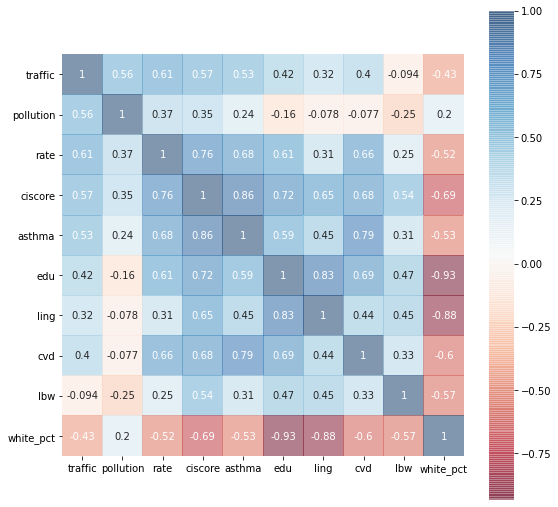

In [44]:
dfData = df5.corr()
plt.subplots(figsize=(9, 9)) 
sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="RdBu", alpha=.5)
plt.show()


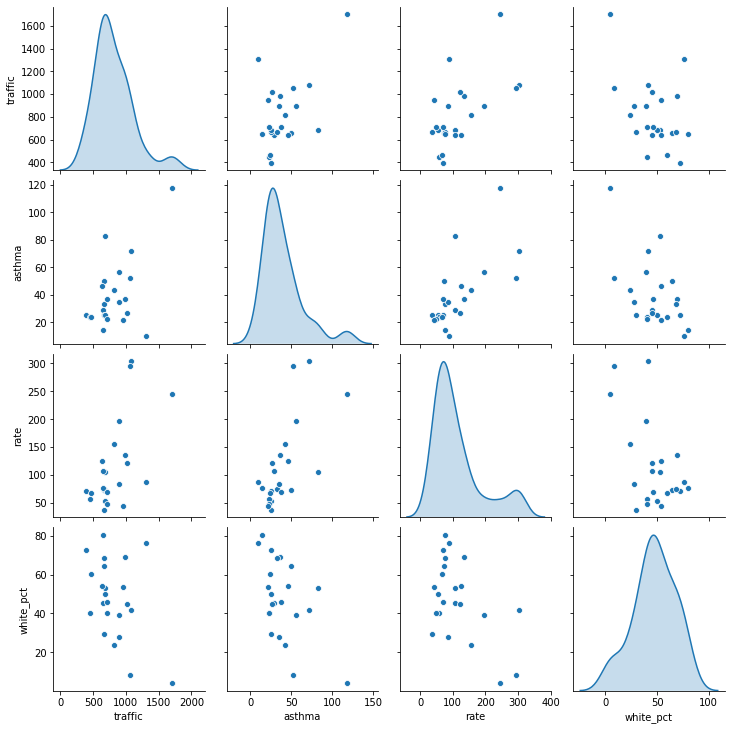

In [45]:
sns.pairplot(df5,vars=["traffic", "asthma","rate","white_pct"],diag_kind="kde")

# 6. Short written analysis of your interpretation of the data.


As can be seen above, socioecnomic status (i.e., percentage of white households, linguistic barrier and education) are intercorrelated, indicating there is certain levels of intersectionality. In terms of health, there is a strong positive correlation between asthma and cardiovascular, which has also be found in research. However, asthma is also positively correlated with covid case. Further, the score calculated (in the CalEnviroScreen 3.0 project) is used to account for the health status and environmental exposure level in the first dataset but, as found in this assignment, it could possibly also partly account for covid cases, which is worth examining further in the future

Relating the socioeconomic (SE) factors to health status, from above we can see that SE factors are correlated with environmental exposure (to traffic and pollutants) and health issues (i.e., low birth weight, cardiovascular disease, asthma, and even covid). Furthermore, a significant finding is that the variable "Percentage of white household" is negatively correlated to other eight variables (ranged from -.40 to -.93). The intersectionality effect of non-white housholds (though not explicitly examined in this assignment) could potentially lead to environmental and health injustice. This can be further analyzed by using the other population-related variable in the dataset or other datasets collected during the rest of the semester.


# 7 Short preliminary plan for the full project.

My research interest lies in transportation, environmental exposure and resultant health injustice issues, so my full project would potentialy focus on their interrelationships. The datasets included in the full project might also include the first datasets for the state of California but might expand the second dataset by going beyond SF.

Screening through the course materials and syllabus, I would like to use advanced analytic technique (e.g., machine learning) to explore the relationships among transportation, environmental exposure, and health effects. Some ideas: 1) I would like to use the technique taught in Wed (wayfinding from origin A to destination B) and let users input the points A and B and then calculate the total exposure of travelers. Or, using this technique to build distance and exposure matrix; 2) I would like to use spatial analysis methods that will be covered in the rest of the semester (spatial autocorrelation, visualziation, etc); 3) I would like to turn some variables into categorical forms so that I can conduct some categorical analysis (currently all the data are in numeric forms).

In [9]:
import geopandas as gpd
from geopandas import GeoDataFrame

In [10]:
cali = gpd.read_file('cb_2018_06_tract_500k/cb_2018_06_tract_500k.shp')

In [11]:
cali


,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,009,000300,1400000US06009000300,06009000300,3,CT,457009794,394122,"POLYGON ((-120.76399 38.21389, -120.76197 38.2..."
1,06,011,000300,1400000US06011000300,06011000300,3,CT,952744514,195376,"POLYGON ((-122.50006 39.12232, -122.50022 39.1..."
2,06,013,303102,1400000US06013303102,06013303102,3031.02,CT,6507019,0,"POLYGON ((-121.72937 37.96884, -121.71409 37.9..."
3,06,013,303202,1400000US06013303202,06013303202,3032.02,CT,3725528,0,"POLYGON ((-121.72346 37.96161, -121.71672 37.9..."
4,06,013,303203,1400000US06013303203,06013303203,3032.03,CT,6354210,0,"POLYGON ((-121.74486 37.95681, -121.74425 37.9..."
...,...,...,...,...,...,...,...,...,...,...
8036,06,075,022902,1400000US06075022902,06075022902,229.02,CT,161833,0,"POLYGON ((-122.41205 37.75423, -122.40925 37.7..."
8037,06,065,044804,1400000US06065044804,06065044804,448.04,CT,2374766,248057,"POLYGON ((-116.51068 33.80502, -116.51069 33.8..."
8038,06,099,003300,1400000US06099003300,06099003300,33,CT,640784444,2596432,"POLYGON ((-121.48677 37.47565, -121.48341 37.4..."
8039,06,037,124400,1400000US06037124400,06037124400,1244,CT,961439,14163,"POLYGON ((-118.41379 34.17940, -118.41160 34.1..."


<AxesSubplot:>

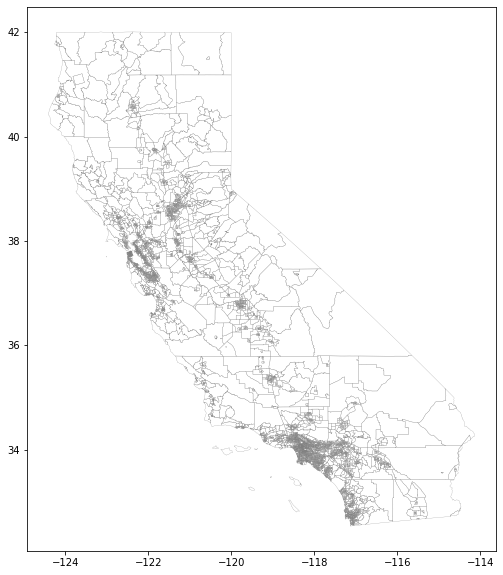

In [9]:
cali.plot(color='none',edgecolor='gray', linewidth=.2, figsize=(14,10))

In [33]:
cali

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,009,000300,1400000US06009000300,06009000300,3,CT,457009794,394122,"POLYGON ((-120.76399 38.21389, -120.76197 38.2..."
1,06,011,000300,1400000US06011000300,06011000300,3,CT,952744514,195376,"POLYGON ((-122.50006 39.12232, -122.50022 39.1..."
2,06,013,303102,1400000US06013303102,06013303102,3031.02,CT,6507019,0,"POLYGON ((-121.72937 37.96884, -121.71409 37.9..."
3,06,013,303202,1400000US06013303202,06013303202,3032.02,CT,3725528,0,"POLYGON ((-121.72346 37.96161, -121.71672 37.9..."
4,06,013,303203,1400000US06013303203,06013303203,3032.03,CT,6354210,0,"POLYGON ((-121.74486 37.95681, -121.74425 37.9..."
...,...,...,...,...,...,...,...,...,...,...
8036,06,075,022902,1400000US06075022902,06075022902,229.02,CT,161833,0,"POLYGON ((-122.41205 37.75423, -122.40925 37.7..."
8037,06,065,044804,1400000US06065044804,06065044804,448.04,CT,2374766,248057,"POLYGON ((-116.51068 33.80502, -116.51069 33.8..."
8038,06,099,003300,1400000US06099003300,06099003300,33,CT,640784444,2596432,"POLYGON ((-121.48677 37.47565, -121.48341 37.4..."
8039,06,037,124400,1400000US06037124400,06037124400,1244,CT,961439,14163,"POLYGON ((-118.41379 34.17940, -118.41160 34.1..."


<AxesSubplot:>

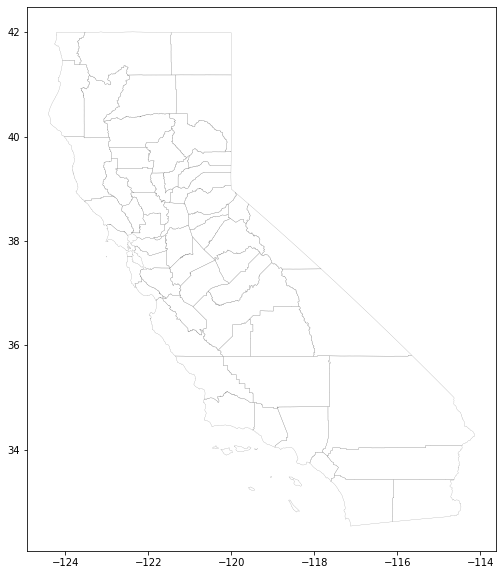

In [41]:
county=cali.dissolve(by='COUNTYFP')
county.plot(color='none',edgecolor='gray', linewidth=.2, figsize=(14,10))

In [42]:
county.head()

,geometry,STATEFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
COUNTYFP,,,,,,,,,
001,"POLYGON ((-121.90392 37.46454, -121.91133 37.4...",06,425101,1400000US06001425101,06001425101,4251.01,CT,590870,2045459
003,"POLYGON ((-120.07239 38.70277, -120.06762 38.7...",06,010000,1400000US06003010000,06003010000,100,CT,1912292630,12557304
005,"POLYGON ((-120.54130 38.42291, -120.54278 38.4...",06,000102,1400000US06005000102,06005000102,1.02,CT,456204145,7940832
007,"POLYGON ((-121.90870 39.30799, -121.90740 39.3...",06,000502,1400000US06007000502,06007000502,5.02,CT,1117426,0
009,"POLYGON ((-120.37620 38.14265, -120.37603 38.1...",06,000300,1400000US06009000300,06009000300,3,CT,457009794,394122


In [43]:
county.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [44]:
cali.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [54]:
df1.longitude = df1.longitude.astype(float)
df1.latitude = df1.latitude.astype(float)

In [55]:
from shapely.geometry import Point
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(df1.longitude, df1.latitude)]
g = GeoDataFrame(df1, crs=crs, geometry=geometry)
g.head()

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,the_geom,tract,pop2010,california,zip,city,longitude,latitude,ciscore,ciscorep,...,native_ame,asian_amer,other_pct,objectid_1,cidecile,civigintil,shape_leng,shape_area,ces2018_rn,geometry
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6083002103.0,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59,...,0.5,7.2,1.6,3507,6,12,6999.35762193,2847611.28417,55-60%,POINT (-120.42706 34.93067)
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6083002402.0,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65,...,0.2,5.5,1.6,2733,7,14,19100.5780032,16352920.1391,65-70%,POINT (-120.47808 34.92880)
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6083002102.0,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45,...,0.5,2.9,2.6,4689,5,9,4970.98593321,1352329.51153,40-45%,POINT (-120.42678 34.94211)
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6083002010.0,4375,Santa Barbara,93455,Santa Maria,-120.410028,34.871428,4.45,2,...,0.6,4.0,2.6,7864,1,1,6558.95614231,2417716.75057,1-5% (lowest scores),POINT (-120.41003 34.87143)
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",6083002009.0,3826,Santa Barbara,93455,Santa Maria,-120.427716,34.872288,5.28,3,...,0.8,3.5,3.2,7863,1,1,6570.36864172,2608421.64363,1-5% (lowest scores),POINT (-120.42772 34.87229)


<AxesSubplot:>

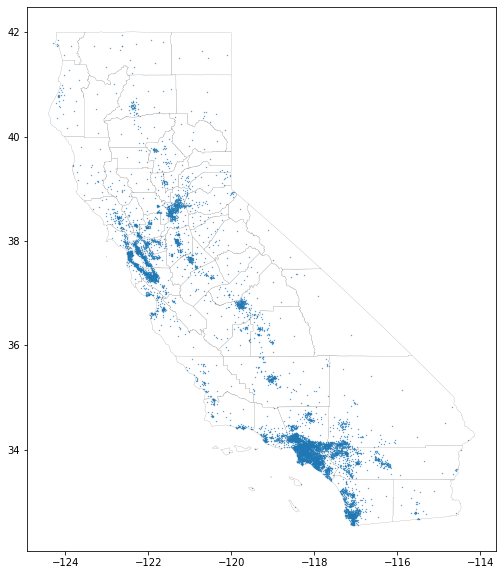

In [60]:
base = county.plot(color='white', edgecolor='black', linewidth=.1, figsize=(14,10))
g.plot(ax=base, markersize=.1)

In [31]:
print(df1['tract'])

0       6083002103.0
1       6083002402.0
2       6083002102.0
3       6083002010.0
4       6083002009.0
            ...     
8030    6037430302.0
8031    6037430723.0
8032      6037431100
8033    6037533603.0
8034    6037534101.0
Name: tract, Length: 8035, dtype: object


In [26]:
len(cali.TRACTCE.unique())

6521

In [13]:
import requests
import json
endpoint_url = "https://www.purpleair.com/json"
response = requests.get(endpoint_url)
results3 = response.text
data = json.loads(results3)
dfff=pd.DataFrame.from_records(data)
dfff.head()

NameError: name 'pd' is not defined

In [4]:
import requests
request_url = "https://www.purpleair.com/json"
response = requests.get(request_url)

In [7]:
response.txt

AttributeError: 'Response' object has no attribute 'txt'

In [ ]:
import json
AP = urllib2.urlopen('url')
wjson = weather.read()
wjdata = json.loads(wjson)
print wjdata['data']['current_condition'][0]['temp_C']

In [2]:
import osmnx
osmnx.graph.graph_from_place("California")


KeyboardInterrupt: 